## Introduction and describe

RU describre:  В рамках задачи регрессии нужно предсказать цену телефона, для классификации - операционную систему или год выпуска устройства.
Для задачи кластеризации необходимо запустить алгоритм кластеризации, в котором количество кластеров и признаки можете выбрать на свое усмотрение.

EN:  As part of the regression task, you need to predict the price of the phone, for classification - the operating system or the year of release of the device.
For the clustering task, it is necessary to run a clustering algorithm in which you can choose the number of clusters and features at your discretion.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
phones = pd.read_csv('kaggle_phone_prices.csv')
phones

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


## Cleaning data and add features
- 

In [14]:
col = phones.columns
phones.rename(columns={ col[0]: 'brand',
                col[1]: 'model',
                col[2]: 'memory',
                col[3]: 'ram',
                col[4]: 'screen',
                col[5]: 'camera',
                col[6]: 'battery',
                col[7]: 'price'})
phones.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [24]:
phones['brand'] = phones['brand'].str.lower()
phones['model'] = phones['model'].str.lower()
phones['memory'] = phones['memory'].str.replace(' GB', '')
phones['ram'] = phones['ram'].str.replace(' GB', '')
phones['num_camer'] =phones['camera'].str.count('\\+') + 1
#phones.drop (columns=phones.columns [-2], axis= 1 , inplace= True )
res1 = []
res2 = []
res3 = []
res4 = []
for cam, num_cam in zip(phones['camera'], phones['num_camer']):
    resolutions = cam.split('+')    
    if num_cam == 1:
        res1.append(resolutions[0])
        res2.append('0')
        res3.append('0')
        res4.append('0')
    
    if num_cam == 2:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append('0')
        res4.append('0')
    
    if num_cam == 3:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append('0')
    
    if num_cam == 4:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append(resolutions[3])
    
phones['camer_1'] = res1
phones['camer_2'] = res2
phones['camer_3'] = res3
phones['camer_4'] = res4

KeyError: 'brand'

In [ ]:

figure = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.scatter(disk, prc)

plt.show()

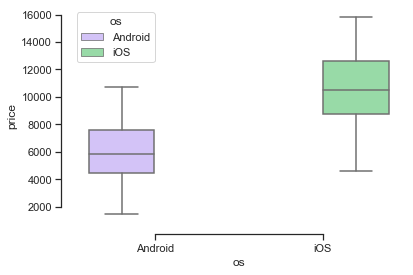

In [21]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="os", y="price",
            hue="os", palette=["m", "g"],
            data=phones)
sns.despine(offset=10, trim=True)

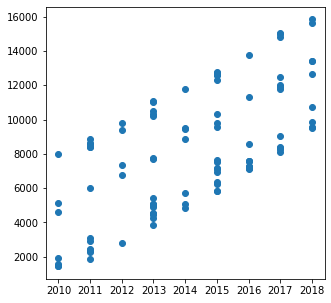

In [12]:
figure = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.scatter(year, prc)

plt.show()

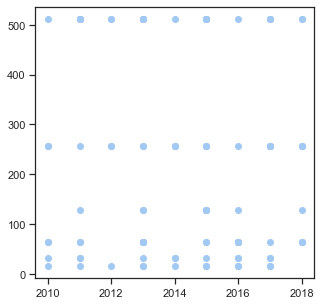

In [22]:
figure = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.scatter(year, disk)

plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

X = phones[['disk', 'year']]
y = phones['price']

reg = LinearRegression().fit(X, y)
a = reg.intercept_
[b1, b2] = reg.coef_

def reg_prediction(disk, year):
    return a + b1*disk + b2*year

reg_prediction(X.disk[0], X.year[0])
reg.predict(X[0:1])[0]

7848.046694419114

In [24]:
from sklearn.ensemble import RandomForestClassifier

y = phones['price']
features = ['disk', 'os', 'year']

X = pd.get_dummies(phones[features])

model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X)